# importing libaray

In [1]:
#---- Operating System & Data Handling ----#
import os
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

#---- Visualization ----#
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#---- Model Selection and Evaluation ----#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#---- Data Preprocessing ----#
from sklearn.preprocessing import StandardScaler

#---- Statistical Model & Feature Selection ----#
import statsmodels.formula.api as sm
import statsmodels.api as sm
from sklearn.feature_selection import RFE

#---- Machine Learning Algorithms ----#
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#---- Model Evaluation Metrics ----#
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#----Visualization Settings----#
%matplotlib inline

# data directory and path

In [2]:
os.chdir(r"C:\Users\PC\Desktop\Machine Learning\Datasets")

In [3]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# data Viewing.

In [4]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
print("Missing Values : ")
data.isnull().sum()

Missing Values : 


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
print ("Rows     : " , data.shape[0])
print ("Columns  : " , data.shape[1])

Rows     :  5000
Columns  :  14


In [8]:
data.shape

(5000, 14)

In [9]:
col_name =['Education', 
                      'Personal Loan', 
                      'Securities Account',
                      'CD Account',
                      'Online',
                      'CreditCard','Family']

In [10]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [11]:
# def create_bar_charts_categorical(data):
#     categorical_columns = data.select_dtypes(include=['int64']).columns.tolist()

#     for column in categorical_columns:
#         plt.figure(figsize=(4, 5))
#         data[column].value_counts().plot(kind='bar', color='skyblue')
#         plt.xlabel(column)
#         plt.ylabel('Count')
#         plt.title(f'Bar Chart of {column}')
#         plt.xticks(rotation=)
#         plt.tight_layout()
#         plt.show()

# df = pd.DataFrame(data)
# create_bar_charts_categorical(df)

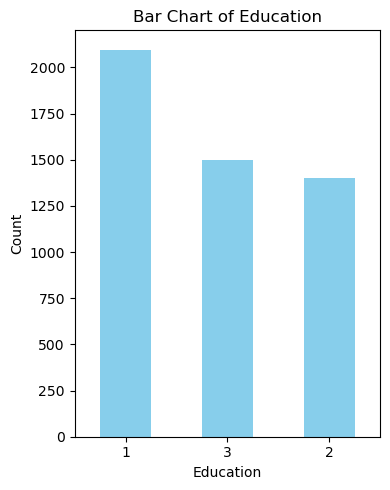

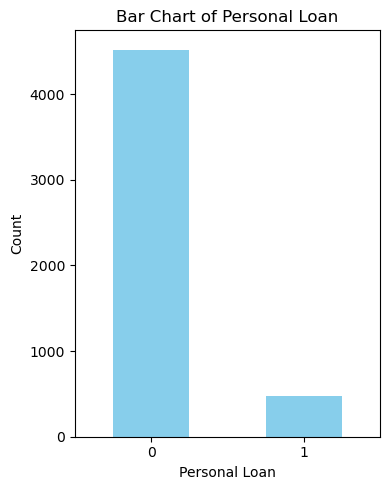

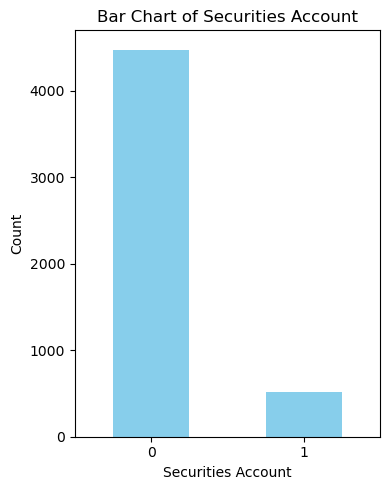

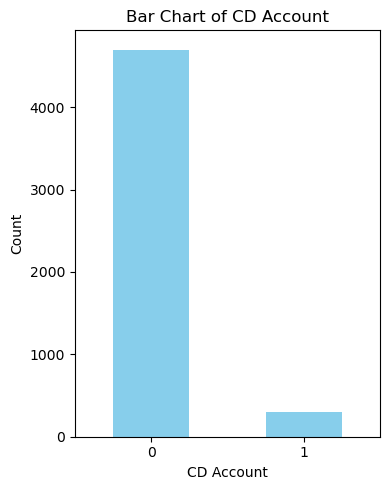

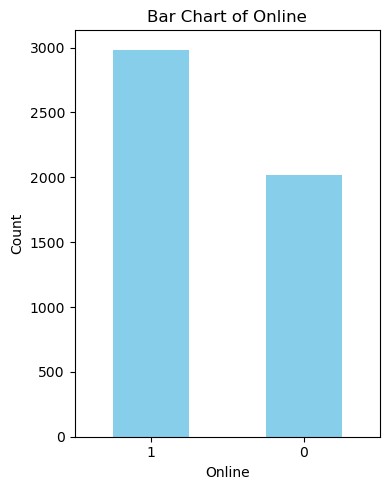

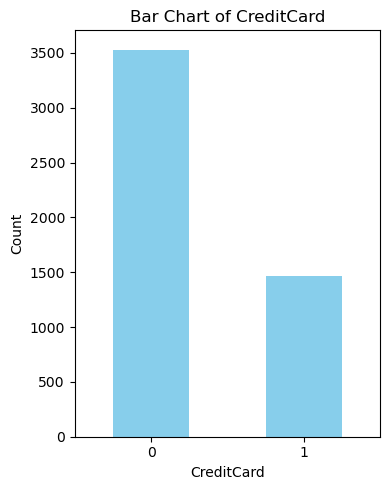

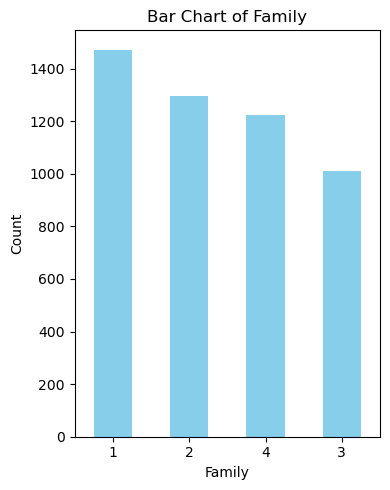

In [12]:
def create_bar_charts_categorical(data):
    categorical_columns = col_name
    
    for column in categorical_columns:
        plt.figure(figsize=(4, 5))
        data[column].value_counts().plot(kind='bar', color='skyblue')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Bar Chart of {column}')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

df = pd.DataFrame(data)
create_bar_charts_categorical(df)

<Axes: xlabel='Personal Loan', ylabel='count'>

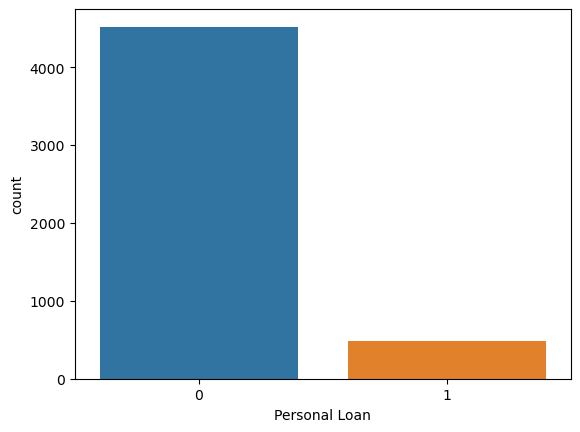

In [13]:
sns.countplot(data=data,x='Personal Loan')

<Axes: xlabel='Personal Loan', ylabel='count'>

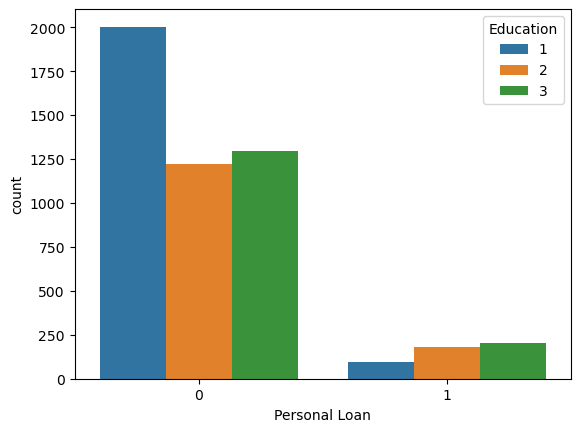

In [14]:
sns.countplot(data=data,x='Personal Loan',hue='Education')

<Axes: >

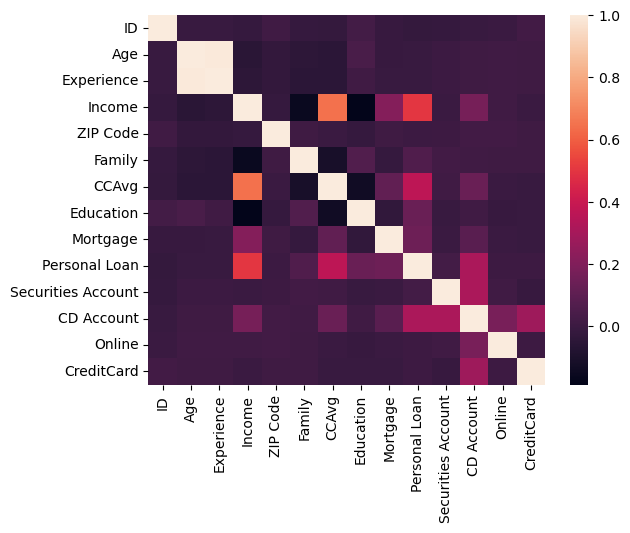

In [15]:
sns.heatmap(data.corr())

# data Processing

In [16]:
data.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [17]:
col_name =['Education', 
                      'Personal Loan', 
                      'Securities Account',
                      'CD Account',
                      'Online',
                      'CreditCard','Family']

In [18]:
y=data['Personal Loan']
print(y.unique())
X=data.drop(['Personal Loan'],axis=1)
X.head()

[0 1]


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [20]:
logreg = LogisticRegression()
rfe = RFE(logreg, )
rfe = rfe.fit(X_train, y_train.values.ravel())
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Age', False, 4),
 ('Experience', False, 5),
 ('Income', False, 6),
 ('Family', False, 3),
 ('CCAvg', True, 1),
 ('Education', True, 1),
 ('Mortgage', False, 7),
 ('Securities Account', True, 1),
 ('CD Account', True, 1),
 ('Online', False, 2),
 ('CreditCard', True, 1)]

In [21]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


In [28]:
import category_encoders as ce

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
y_pred_gini = clf_gini.predict(X_test)

In [24]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9753


In [25]:
rfe.score(X_train, y_train)

0.9277142857142857

In [26]:
rfe.score(X_test, y_test)

0.9186666666666666